In [70]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from projLib.pair_constructor import PairConfiguration
from sklearn import metrics

In [10]:
config_2 = PairConfiguration(["/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/train.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/val.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/test.json"], "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json",k=20 ,n=[3])

/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/projLib/pair_constructor.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.valid_labels.loc[:,"content_combo"] = self.valid_labels["list_object"].apply(lambda x: frozenset(filter(lambda t: t in self.content_categories, x)))


In [83]:
results = pd.read_csv("results4.csv")

In [84]:
display(results)

,Unnamed: 0,metric,139,709,110,660,579,95,429,817,229,1128,235,126,1144,453,133,41,347,382,211,805
0,0,acc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.984375,0.996875,1.0,0.984375,0.984375,0.9875,1.0,0.978125,1.0,0.984375,0.984375,1.0,1.0
1,1,prec,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.980695,1.000000,1.0,1.000000,1.000000,0.0000,0.0,1.000000,0.0,1.000000,0.993197,1.0,1.0
2,2,recall,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.500000,1.0,0.886364,0.964286,0.0000,0.0,0.766667,0.0,0.947917,0.973333,1.0,1.0
3,3,f1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.990253,0.666667,1.0,0.939759,0.981818,0.0000,0.0,0.867925,0.0,0.973262,0.983165,1.0,1.0
4,4,roc_auc,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,0.962121,0.750000,1.0,0.943182,0.982143,-1.0000,-1.0,0.883333,-1.0,0.973958,0.983725,1.0,-1.0


In [85]:
pd.set_option('display.max_columns', None)  # or 1000
display(results.rename(lambda col: config_2.categories_decoder.get(int(col)) if col.isnumeric()  else "", axis=1))

,,,bowl,monkey,blanket,lion,horse,bicycle,elephant,pillow,cat,towel,cellular_telephone,book,truck,fish,bottle,ball,cup,dog,car,person
0,0,acc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.984375,0.996875,1.0,0.984375,0.984375,0.9875,1.0,0.978125,1.0,0.984375,0.984375,1.0,1.0
1,1,prec,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.980695,1.000000,1.0,1.000000,1.000000,0.0000,0.0,1.000000,0.0,1.000000,0.993197,1.0,1.0
2,2,recall,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.500000,1.0,0.886364,0.964286,0.0000,0.0,0.766667,0.0,0.947917,0.973333,1.0,1.0
3,3,f1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.990253,0.666667,1.0,0.939759,0.981818,0.0000,0.0,0.867925,0.0,0.973262,0.983165,1.0,1.0
4,4,roc_auc,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,0.962121,0.750000,1.0,0.943182,0.982143,-1.0000,-1.0,0.883333,-1.0,0.973958,0.983725,1.0,-1.0


In [86]:
with open("raw_preds4.json", "r") as f:
    raw_preds = json.load(f)

preds = list(zip(*list(raw_preds.values())))
predsums = []
for pred in preds:
    predsums.append(sum(pred))


In [87]:
with open("raw_labels4.json", "r") as f:
    raw_labels = json.load(f)

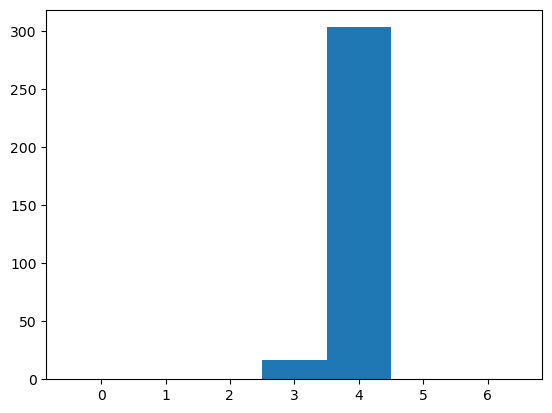

In [89]:
bins = np.arange(0, 7.5) - 0.5
fig, ax = plt.subplots()
_ = ax.hist(predsums, bins)
ax.set_xticks([0,1,2,3,4,5,6])

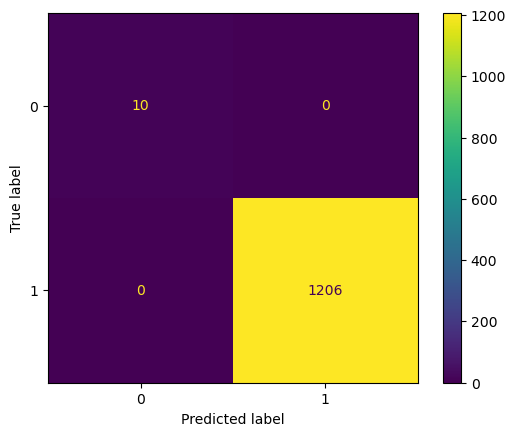

In [75]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["805.0"], raw_labels["805.0"])

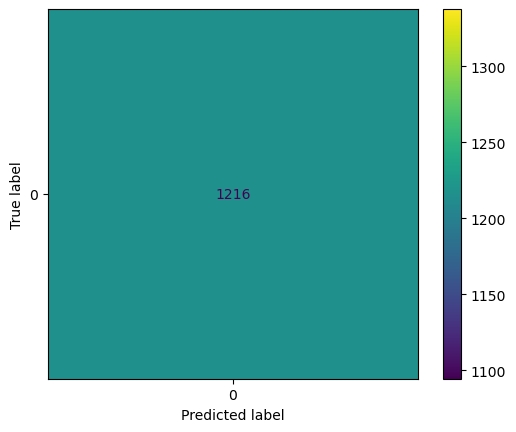

In [77]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["660.0"], raw_labels["660.0"])

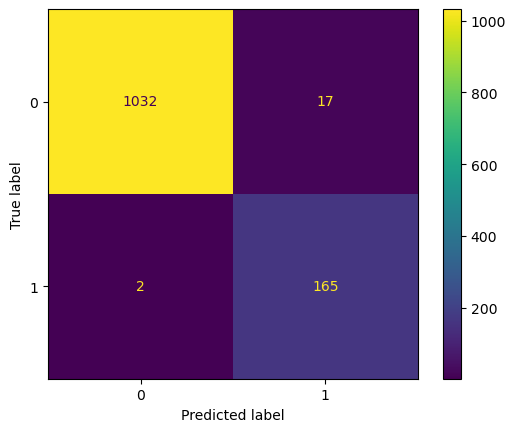

In [78]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["382.0"], raw_labels["382.0"])

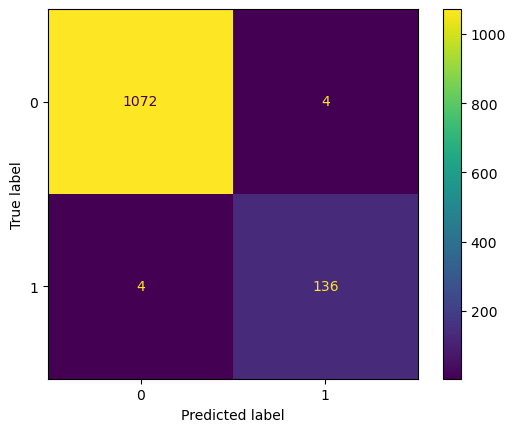

In [79]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["211.0"], raw_labels["211.0"])

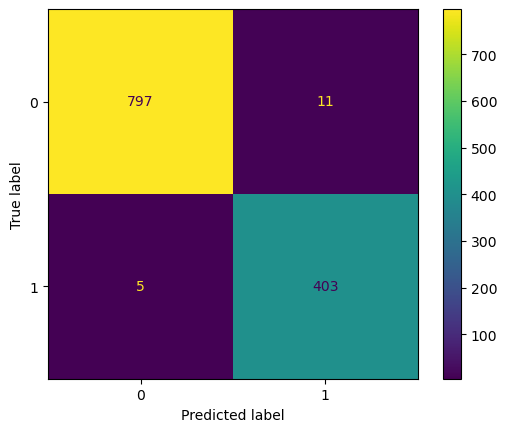

In [82]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["347.0"], raw_labels["347.0"])